## Distribution of editing efficiency

### PRIDICT

The dataset of pridict-1 has 90k examples, the example suggests using a zero inflated poisson or gaussian distribution

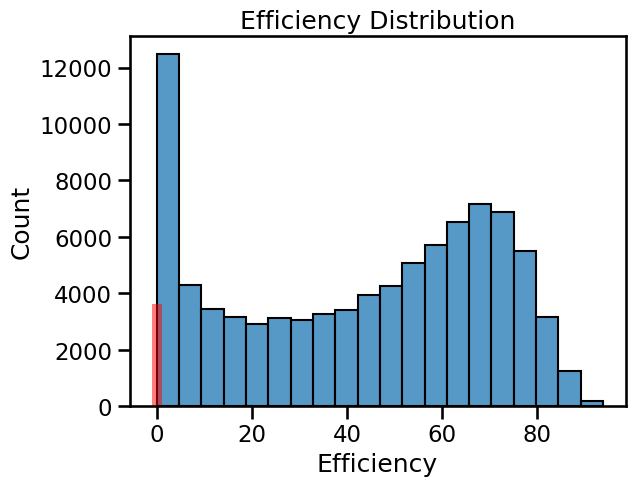

In [7]:
from os.path import join as pjoin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
path = pjoin('data', 'pridict-90k.csv')
df = pd.read_csv(path)

efficiency_col = 'averageedited'
df = df[df[efficiency_col].notnull()]


# list out zero efficiency as a separate group
zero_efficiency = df[df[efficiency_col] == 0]
non_zero_efficiency = df[df[efficiency_col] > 0]

# plot the distribution of efficiency
fig, ax = plt.subplots()
sns.histplot(non_zero_efficiency[efficiency_col], bins=20, ax=ax)
ax.set_xlabel('Efficiency')
ax.set_ylabel('Count')
ax.set_title('Efficiency Distribution')

# true zero is a separate bar
ax.bar(0, len(zero_efficiency), color='red', alpha=0.5, width=2)


# save the figure
fig.savefig(pjoin('figures', 'efficiency_distribution.png'))

In [3]:
# acquire a subset of the pridict 90k dataset
from os.path import join as pjoin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
path = pjoin('data', 'pridict-90k.csv')
df = pd.read_csv(path)

efficiency_col = 'averageedited'
df = df[df[efficiency_col].notnull()]

# rename name column to HGVS
df.rename(columns={'Name': 'HGVS'}, inplace=True)

# get 1000 random samples and save a pridict-90k-small.csv
df.sample(1000).to_csv(pjoin('data', 'pridict-90k-small.csv'), index=False)

# Data Parsing

## HGVS to hg38 coordinates

In [2]:
from dataset import parse_hgvs
from os.path import join as pjoin
import pandas as pd

# load the small dataset
path = pjoin('data', 'pridict-90k-small.csv')

df = pd.read_csv(path)
df = parse_hgvs(df)

print(df.head())

100%|██████████| 2/2 [00:07<00:00,  3.69s/it]

   averageedited  averageunedited  averageindel  \
0      61.037202        15.624968     23.337831   
1      75.728608        21.184532      3.086859   
2      62.291955        14.233247     23.474798   
3      73.368779        12.469879     14.161342   
4       2.869652        92.088859      5.041489   

                                              HGVS   Gene  \
0           NM_000157.4(GBA):c.630del (p.Val211fs)    GBA   
1           NM_178152.3(DCX):c.266G>C (p.Arg89Pro)    DCX   
2        NM_000527.4(LDLR):c.1786A>T (p.Lys596Ter)   LDLR   
3       NM_000135.4(FANCA):c.3558dup (p.Arg1187fs)  FANCA   
4  NM_006920.6(SCN1A):c.3769_3779del (p.Leu1257fs)  SCN1A   

                                           Phenotype  PBSlength  \
0                                    Gaucher disease         13   
1                                        Heterotopia         13   
2                      Familial hypercholesterolemia         13   
3  Fanconi anemia;Fanconi anemia, complementation...      